In [1]:
import Pkg
Pkg.add(["Plots","Distributions","Random","Statistics","Turing","FillArrays","StatsPlots"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
using Distributions, Plots, Random, Statistics, Turing, FillArrays, StatsPlots

In [43]:
# we compare two groups and we are interested in the difference of their mean
mu1 = 0.0
mu2 = 0.5
sig1 = 1.0
sig2 = 1.2
d1 = Normal(mu1,sig1)
d2 = Normal(mu2,sig2)
sample1 = rand(d1,20)
sample2 = rand(d2,15)

15-element Vector{Float64}:
  2.9194754782448844
  0.7700395384529453
  1.3775494705133307
  0.3787117513547322
  0.034125165004517066
 -0.46946411147031386
  0.3901750532898946
  0.3252672201834621
 -1.1739281244027542
  0.9542997584372572
 -1.4701944911256621
  2.185291810157202
 -0.07212662414586701
  0.43544917175981157
 -0.5663500044050336

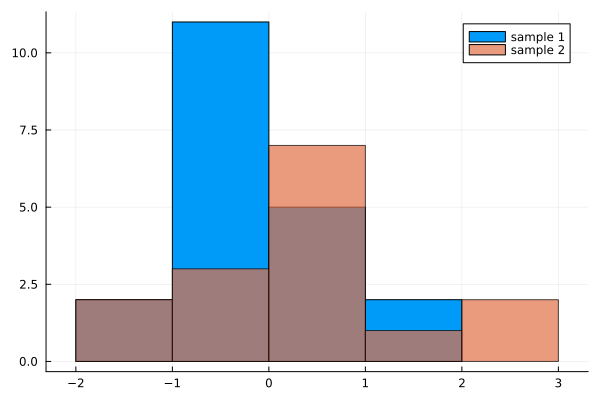

In [44]:
histogram(sample1, bins=5, label="sample 1")
histogram!(sample2, bins=5, label="sample 2",alpha = 0.7)

In [45]:
mean(sample2), mean(sample1)

(0.4012214041232271, -0.2621365301802955)

In [46]:
mean(sample2)-mean(sample1)

0.6633579343035225

In [11]:
@model function singlenorm(data)
    μ ~ Uniform(-10,10)
    σ ~ Uniform(0.1,5)
#    for i in 1:length(data)
#        data[i] ~ Normal(μ,σ)
#    end
# we can do the same using a multivariate Normal
    data ~ MvNormal(ones(length(data))*μ,σ)
end

singlenorm (generic function with 2 methods)

In [47]:
model1 = singlenorm(sample1)

DynamicPPL.Model{typeof(singlenorm), (:data,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(singlenorm, (data = [0.31072131766656175, 0.14032270030912075, -0.37995773398393207, -1.9006507069822454, 0.05281777496433453, -0.8721838074029836, -0.0020341483714381116, -0.6440946541164682, -0.3500686946017087, -0.35829052827548447, -0.6877347581265232, 0.23267047510517266, 1.1453246528564105, -0.17904924988069368, -0.4504352053779133, 0.05404274006814884, -0.806101070055058, 1.0841993998465869, -1.3778751964296099, -0.254353910818187],), NamedTuple(), DynamicPPL.DefaultContext())

In [48]:
# we are sampling from P(μ,σ | sample1)
chain1 = sample(model1, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 0.2


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.1 seconds
Compute duration  = 0.1 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           μ   -0.2643    0.1834    0.0064   805.0916   527.2262    1.0011     ⋯
           σ    0.7716    0.1348    0.0071   388.6041   303.6059    1.0029     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           μ 

In [49]:
model2 = singlenorm(sample2)

DynamicPPL.Model{typeof(singlenorm), (:data,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(singlenorm, (data = [2.9194754782448844, 0.7700395384529453, 1.3775494705133307, 0.3787117513547322, 0.034125165004517066, -0.46946411147031386, 0.3901750532898946, 0.3252672201834621, -1.1739281244027542, 0.9542997584372572, -1.4701944911256621, 2.185291810157202, -0.07212662414586701, 0.43544917175981157, -0.5663500044050336],), NamedTuple(), DynamicPPL.DefaultContext())

In [50]:
chain2 = sample(model2, NUTS(0.65), 1000)

┌ Info: Found initial step size
└   ϵ = 0.2


Chains MCMC chain (1000×14×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.04 seconds
Compute duration  = 0.04 seconds
parameters        = μ, σ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           μ    0.3917    0.3515    0.0143   634.7233   530.4696    0.9990     ⋯
           σ    1.3029    0.2952    0.0136   502.8439   581.6429    1.0027     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           

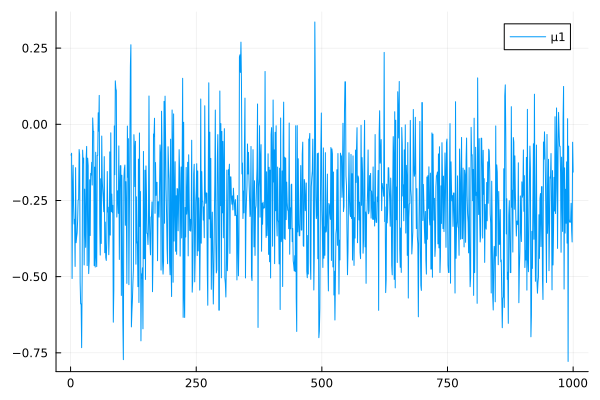

In [51]:
plot(chain1[:μ], label="μ1")

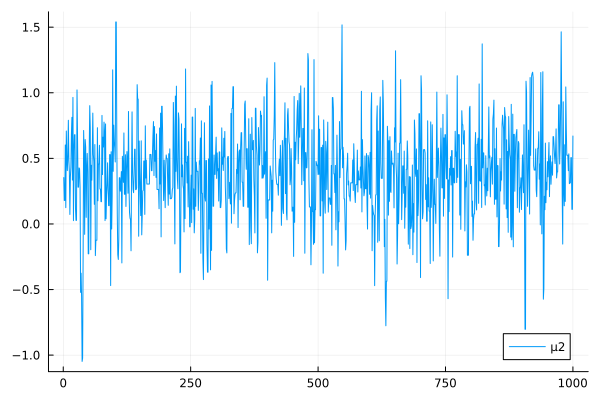

In [52]:
plot(chain2[:μ], label="μ2")

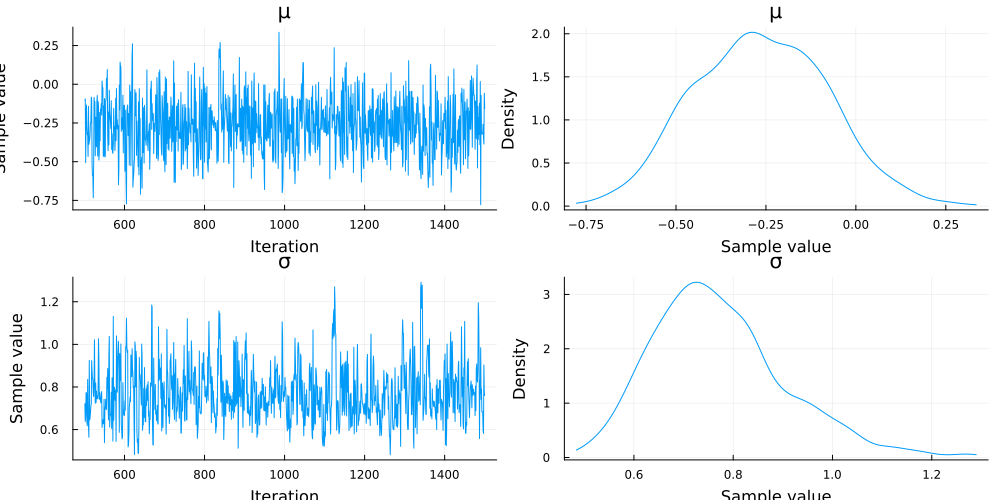

In [53]:
plot(chain1)

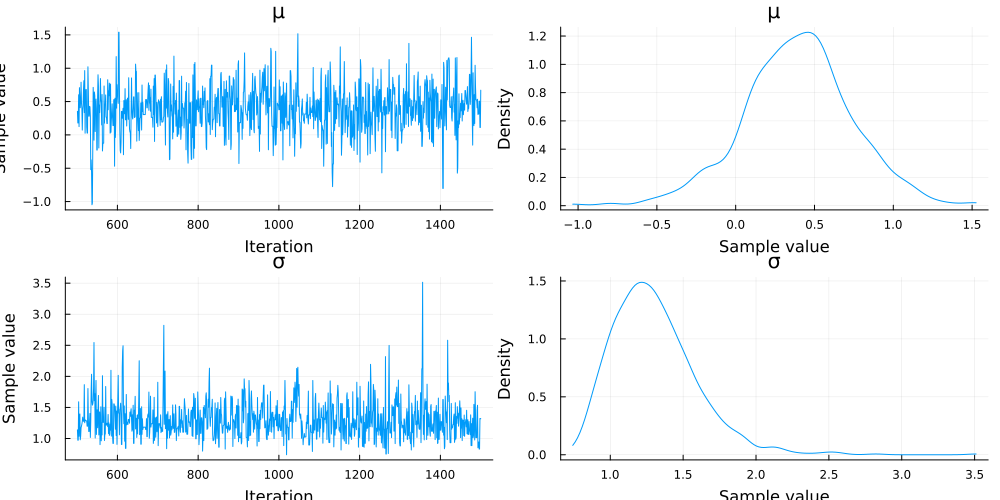

In [54]:
plot(chain2)

In [55]:
delta_mu = chain2[:μ] .- chain1[:μ]

1000×1 Matrix{Float64}:
 0.4546780210078385
 0.27407233950575005
 0.6851785769654661
 0.8053665046960372
 0.2585488397810245
 0.9794359063154712
 0.8329357680605067
 0.7187263516023492
 0.9908942962335185
 0.9328731744489875
 0.8706924429023086
 0.7696342758264265
 0.4292741320783655
 ⋮
 0.5056506405141654
 1.3021831157225332
 0.47795678575083045
 0.8451284933158156
 0.6280523445632191
 0.6341124942326157
 0.6341124942326157
 0.7648007775088566
 0.8523135391180396
 0.4974647033038515
 0.170091271588797
 0.8273803261380408

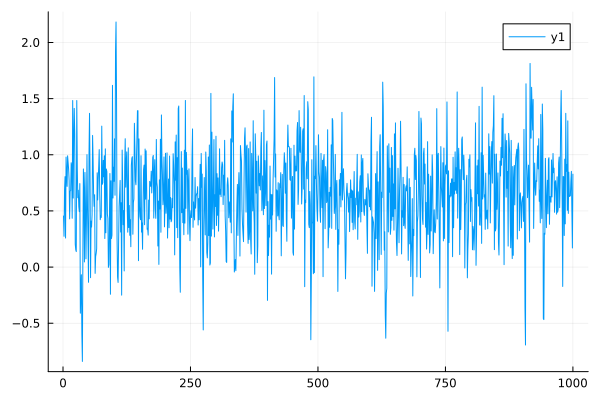

In [56]:
plot(delta_mu)

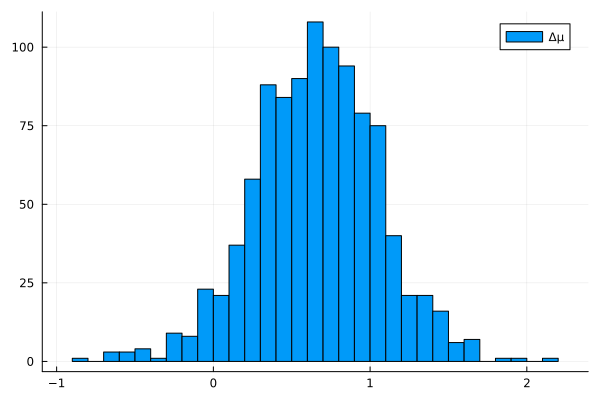

In [60]:
histogram(delta_mu, label="Δμ")

In [58]:
mean(delta_mu)

0.6560647000994128

In [59]:
std(delta_mu)

0.39951570777419493

In [64]:
@model function twonorms(data1, data2)
    μ ~ Uniform(-10,10)
    dμ ~ Uniform(-5,5)
    σ1 ~ Uniform(0.1,5)
    σ2 ~ Uniform(0.1,5)
    data1 ~ MvNormal(ones(length(data1))*(μ - dμ/2),σ1)
    data2 ~ MvNormal(ones(length(data2))*(μ + dμ/2),σ2)
end

twonorms (generic function with 2 methods)

In [65]:
model2samples = twonorms(sample1, sample2)

DynamicPPL.Model{typeof(twonorms), (:data1, :data2), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(twonorms, (data1 = [0.31072131766656175, 0.14032270030912075, -0.37995773398393207, -1.9006507069822454, 0.05281777496433453, -0.8721838074029836, -0.0020341483714381116, -0.6440946541164682, -0.3500686946017087, -0.35829052827548447, -0.6877347581265232, 0.23267047510517266, 1.1453246528564105, -0.17904924988069368, -0.4504352053779133, 0.05404274006814884, -0.806101070055058, 1.0841993998465869, -1.3778751964296099, -0.254353910818187], data2 = [2.9194754782448844, 0.7700395384529453, 1.3775494705133307, 0.3787117513547322, 0.034125165004517066, -0.46946411147031386, 0.3901750532898946, 0.3252672201834621, -1.1739281244027542, 0.9542997584372572, -1.4701944911256621, 2.185291810157202, -0.07212662414586701, 0.43544917175981157, -0.5663500044050336]), NamedTuple(), DynamicPPL.DefaultContext())

In [66]:
chain_twos = sample(model2samples, NUTS(0.65),1000)

┌ Info: Found initial step size
└   ϵ = 0.05


Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 3.12 seconds
Compute duration  = 3.12 seconds
parameters        = μ, dμ, σ1, σ2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           μ    0.0745    0.1830    0.0077   571.9624   503.2651    1.0085     ⋯
          dμ    0.6686    0.3571    0.0154   536.6655   562.0172    1.0051     ⋯
          σ1    0.7771    0.1416    0.0052   843.3370   578.2376    0.9991     ⋯
          σ2    1.2712    0.2568    0.0089   929.2823   778.8563    0.9994     ⋯
                                                             

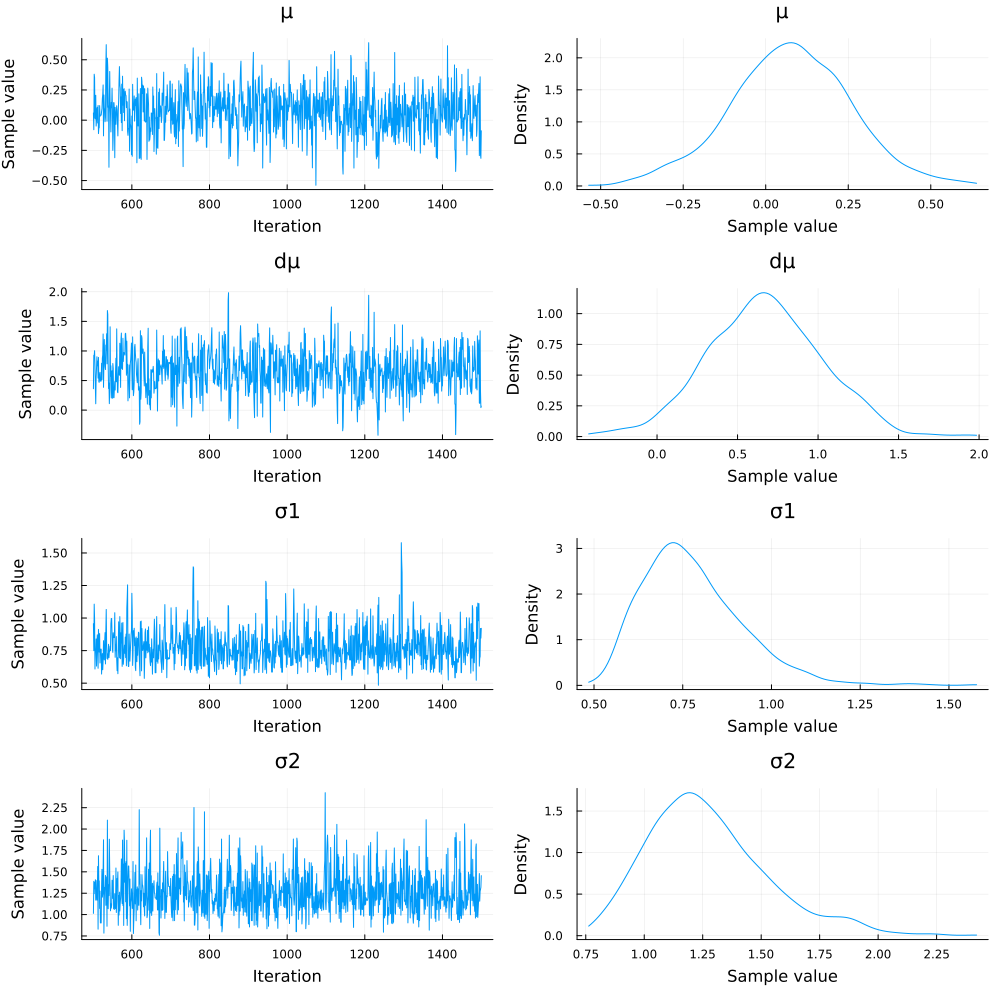

In [67]:
plot(chain_twos)

In [68]:
# second example:
# We conduct a series of measurements.  We know that the true value of the measurement is drawn

In [72]:
sampled1 = rand(d1,10000)

10000-element Vector{Float64}:
 -1.9989332771325343
  0.23393624288797613
  1.8680790266430478
 -0.9682203452030886
 -1.9925541943100855
  0.22080063652712936
  1.3990204768215104
 -0.5821070530638002
 -1.276521314508324
 -0.9282224714208878
 -0.26319457238661526
 -0.3911114790829342
 -0.7438376971039109
  ⋮
  1.1028892042385237
 -1.3636394380191308
  0.8107664053216992
  0.8607825262571753
  2.0505610295465893
  0.5013161641797187
 -0.6751855664680302
 -1.6686013190818043
  1.355965960849353
  0.6218267387888244
  0.35328479459915396
  1.9770528028981686

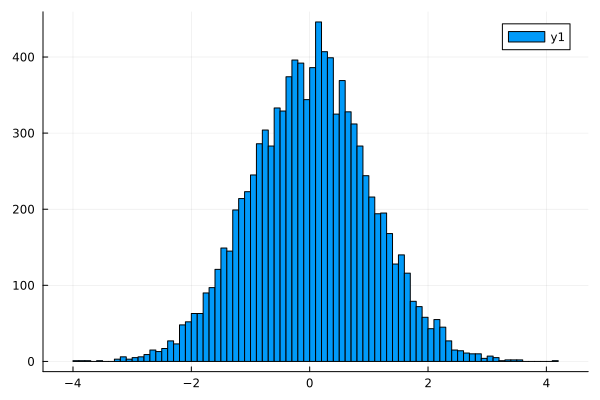

In [74]:
histogram(sampled1,bins=100)

In [75]:
sampled1_noise = sampled1 + rand(d1,length(sampled1))

10000-element Vector{Float64}:
 -1.7544176429488123
  0.2364347429983491
  2.3029920393845735
  0.009314499080718464
 -2.9687528059593458
  0.571531047482163
  0.692669199668618
 -0.7775360708936958
  0.04253073674868091
 -0.6164596276658872
 -1.2175127922967393
 -0.6846000354440018
  1.1204763170457324
  ⋮
  0.6878225961978461
 -0.3900662906055924
  0.02013981513337315
 -0.17438666634799382
  3.1431839469532905
  2.804198386415938
  0.6909571797779341
 -2.218966582139701
  2.0470609129815367
 -0.41419619053025103
  2.4645155760986563
  1.0583938263670398

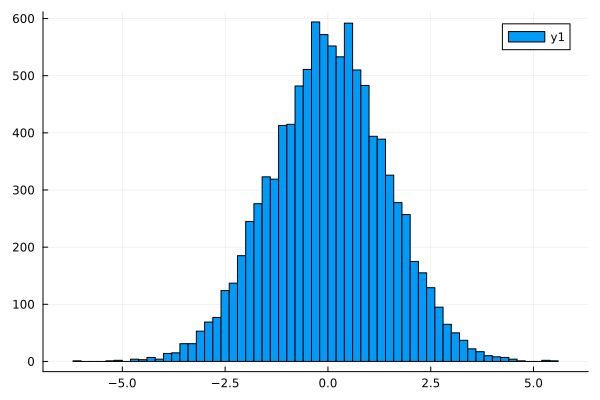

In [76]:
histogram(sampled1_noise)

In [77]:
mean(sampled1_noise)

0.025303368572491557

In [78]:
std(sampled1_noise)

1.406809686420929

In [79]:
std(sampled1)

1.0106665519049085